In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./fashion-mnist_test.csv")
x = data.values
X = x[:,1:]
y = x[:,0]
X = X/255.0

print (X.shape, y.shape)

(10000, 784) (10000,)


In [6]:
X_train = X[:8000,:]
y_train = y[:8000]

X_val = X[8000:,:]
y_val = y[8000:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


In [7]:
INP = 784
H1_SIZE = 256
H2_SIZE = 64
OUT = 10
BATCH_SIZE=200
EPOCH = 50
LR = 0.0003

In [8]:
def acciracy(y_pred,y_act):
    return ( 100.0*np.sum(y_pred==y_act)/y_pred.shape[0] )

In [9]:
def init_weights():
    
    np.random.seed(0)
    model = {}
    model["W1"] = np.random.randn(INP,H1_SIZE)/np.sqrt(INP)
    model["B1"] = np.zeros((1,H1_SIZE))
    model["W2"] = np.random.randn(H1_SIZE,H2_SIZE)/np.sqrt(H1_SIZE)
    model["B2"] = np.zeros((1,H2_SIZE))
    model["W3"] = np.random.randn(H2_SIZE,OUT)/np.sqrt(H2_SIZE)
    model["B3"] = np.zeros((1,OUT))
    
    return model
    

In [10]:
def forward_prop(model,x):
    
    z1 = x.dot(model["W1"]) + model["B1"]
    a1 = np.tanh(z1)
    z2 = a1.dot(model["W2"]) + model["B2"]
    a2 = np.tanh(z2)
    z3 = a2.dot(model["W3"]) + model["B3"]
    h_x = np.exp(z3)
    y_out = h_x/ np.sum(h_x, axis=1, keepdims=True)
    
    return a1,a2,y_out

In [11]:
def back_prop(model, x, a1, a2, y_out, y_act):
    
    delta3 = y_out
    delta3[range(y_act.shape[0]), y_act] -= 1
    dw3 = (a2.T).dot(delta3)
    db3 = np.sum(delta3, axis=0)
    delta2 = (1-np.square(a2))*delta3.dot(model["W3"].T)
    dw2 = (a1.T).dot(delta2)
    db2 = np.sum(delta2, axis=0)
    delta1 = (1-np.square(a1))*delta2.dot(model["W2"].T)
    dw1 = (x.T).dot(delta1)
    db1 = np.sum(delta1, axis=0)
    
    model["W3"] -= LR*dw3
    model["B3"] -= LR*db3
    model["W2"] -= LR*dw2
    model["B2"] -= LR*db2
    model["W1"] -= LR*dw1
    model["B1"] -= LR*db1
    
    return model

In [12]:
def loss(model, y_pred, y_act):
    
    correct_logprobs = -np.log(y_pred[range(y_act.shape[0]), y_act])
    l = np.sum(correct_logprobs)
    
    return(1.0/y_pred.shape[0])*l

In [14]:
def predict(y_out):
    return np.argmax(y_out,axis=1)

In [20]:
def main():
    training_loss = []
    val_loss = []
    val_acc = []
    model = init_weights()
    
    for e in range(EPOCH):
        print ("\n epoch : %d" %(e+1))
        count = 0
        while (count + BATCH_SIZE < y_train.shape[0]):
            batch_data = X_train[count : (count+BATCH_SIZE), :]
            batch_labels = y_train[count : (count+BATCH_SIZE)]
            
            count += BATCH_SIZE
            
            a1,a2,y_out = forward_prop(model, batch_data)
            model = back_prop(model, batch_data, a1, a2, y_out, batch_labels)

        _,_,y_out = forward_prop(model, X_train)
        loss_t = loss(model,y_out,y_train)
        training_loss.append(loss_t)
        
        print("training_loss : %.3f" %loss_t)
        _,_,p = forward_prop(model, X_val)
        pred = predict(p)
        loss_v = loss(model,p,y_val)
        acc_v = acciracy(pred, y_val)
        val_loss.append(loss_v)
        val_acc.append(acc_v)
        
        print("val_loss : %.3f" %loss_v)
        print("val_acc : %.3f" %acc_v)
    
    print("#################COMPLETED################")
    
    return training_loss,val_loss,val_acc        

In [23]:
training_loss, val_loss, val_acc = main()


 epoch : 1
training_loss : 1.022
val_loss : 1.024
val_acc : 66.950

 epoch : 2
training_loss : 0.805
val_loss : 0.805
val_acc : 72.850

 epoch : 3
training_loss : 0.710
val_loss : 0.708
val_acc : 75.750

 epoch : 4
training_loss : 0.651
val_loss : 0.647
val_acc : 77.000

 epoch : 5
training_loss : 0.608
val_loss : 0.605
val_acc : 79.300

 epoch : 6
training_loss : 0.576
val_loss : 0.574
val_acc : 79.850

 epoch : 7
training_loss : 0.552
val_loss : 0.551
val_acc : 80.750

 epoch : 8
training_loss : 0.532
val_loss : 0.533
val_acc : 80.950

 epoch : 9
training_loss : 0.516
val_loss : 0.520
val_acc : 81.200

 epoch : 10
training_loss : 0.503
val_loss : 0.509
val_acc : 81.800

 epoch : 11
training_loss : 0.491
val_loss : 0.500
val_acc : 82.200

 epoch : 12
training_loss : 0.481
val_loss : 0.493
val_acc : 82.300

 epoch : 13
training_loss : 0.472
val_loss : 0.486
val_acc : 82.250

 epoch : 14
training_loss : 0.464
val_loss : 0.480
val_acc : 82.650

 epoch : 15
training_loss : 0.457
val_loss

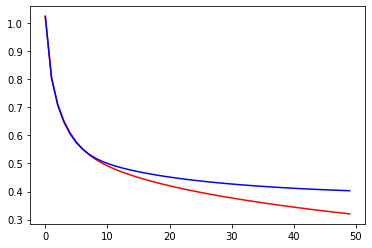

In [25]:
plt.figure(0)
plt.plot(training_loss, color = 'red')
plt.plot(val_loss, color = 'blue')
plt.show()

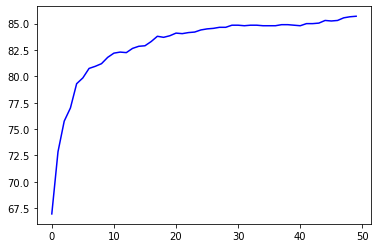

In [24]:
plt.figure(0)
plt.plot(val_acc, color = 'blue')
plt.show()